*_<h1 align='center'> Twitter Sentiment Data Classification </h1>_*
_<h3 align='center'> [Project based on Natural Language Processing] </h3>_

---

**DONE BY:** Tarun Sanjeev S <br>
**ROLL NO:** CB.EN.U4AIE19064 <br>
**EMAIL:** iamtarunsanjeev@gmail.com <br>

*_<h2 align='center'>A. Importing necessary Libraries</h2>_*

---

In [1]:
#Import Libraries
import sys
import random
import re
import math
import warnings

# Necessary for mathematical computation and visualisation
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Necessary for processing with NLTK
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report

warnings.filterwarnings('ignore')

*_<h2 align='center'>B. Data Analysis</h2>_*

---

In [2]:
# Reading the csv data file from the location. Change this to run the code further.
df = pd.read_csv("C:/Users/iamta/Desktop/twitter-sentiment-dataset/Twitter_Data.csv")
print("Dimensions of the given data = ", df.shape)

features = list(df.columns.values)
print("\nColumn features in the data:\n", features)

print("\nData :")
df.head()

Dimensions of the given data =  (162980, 2)

Column features in the data:
 ['clean_text', 'category']

Data :


,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


#### _Removing Null data entries_

In [3]:
print("Data Before Cleaning:\n", df.isnull().sum())
df = df[~df['category'].isnull()]

# Cleaning and clearing the null values from the data
df = df[~df['clean_text'].isnull()]
print("\nData After Cleaning:\n", df.isnull().sum())

Data Before Cleaning:
 clean_text    4
category      7
dtype: int64

Data After Cleaning:
 clean_text    0
category      0
dtype: int64


#### _Data Cleaning_

In [4]:
# Replacing extra lines with full stops and then removing extra symbols other than the alphabets
def CleanTxt(txt):
    txt = re.sub(r'(\n+)', '. ', txt)
    txt = re.sub(r'[^A-za-z,.\s]', '', txt)
    return txt
    
# Updating and printing the dataframe
df['clean_text'] = df['clean_text'].apply(CleanTxt);
df

,clean_text,category
0,when modi promised minimum government maximum ...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these crores paid neerav modi not recover...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


#### _Word Cloud Representations_

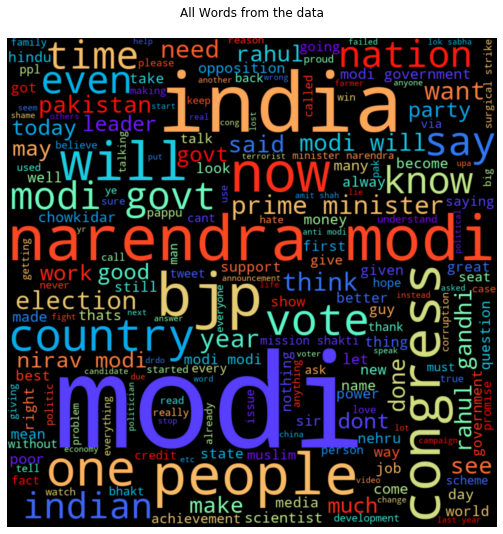

In [5]:
# Taking all the words from the cleaned data and displaying them in the word cloud
allwords = ''.join([cmts for cmts in df['clean_text']])
# Creating the word cloud for all the words
wrdcld = WordCloud(width = 900, height = 900, random_state = random.randint(1, 1501), max_font_size = 240, colormap = 'rainbow').generate(allwords)

# Plotting the figure
plt.figure(figsize=(9,9))
plt.imshow(wrdcld, interpolation = "gaussian")

plt.title("All Words from the data\n")
plt.axis('off')
plt.show()

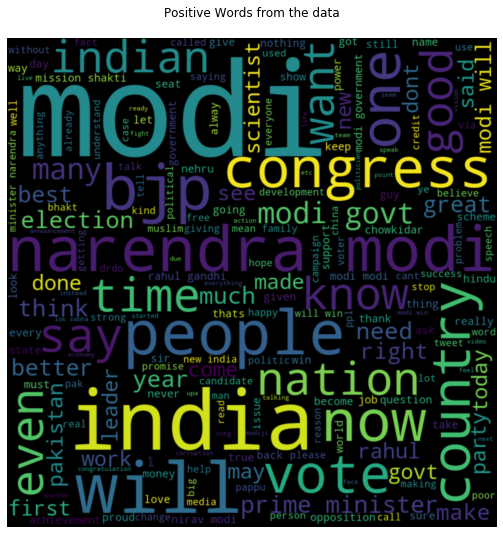

In [6]:
# Taking all the positive words from the cleaned data and displaying them in the word cloud
allwords = ''.join([cmts for cmts in df['clean_text'][df['category'] == 1]])
# Creating the word cloud for all the positive words
wrdcld = WordCloud(width = 900, height = 900, random_state = random.randint(1, 1501), max_font_size = 240, colormap = 'viridis').generate(allwords)

# Plotting the figure
plt.figure(figsize=(9,9))
plt.imshow(wrdcld, interpolation = "gaussian")

plt.title("Positive Words from the data\n")
plt.axis('off')
plt.show()

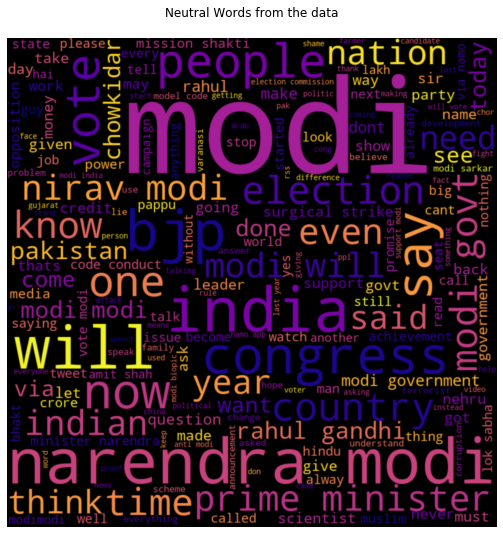

In [7]:
# Taking all the neutral words from the cleaned data and displaying them in the word cloud
allwords = ''.join([cmts for cmts in df['clean_text'][df['category'] == 0]])
# Creating the word cloud for all the neutral words
wrdcld = WordCloud(width = 900, height = 900, random_state = random.randint(1, 1501), max_font_size = 240, colormap = 'plasma').generate(allwords)

# Plotting the figure
plt.figure(figsize=(9,9))
plt.imshow(wrdcld, interpolation = "gaussian")

plt.title("Neutral Words from the data\n")
plt.axis('off')
plt.show()

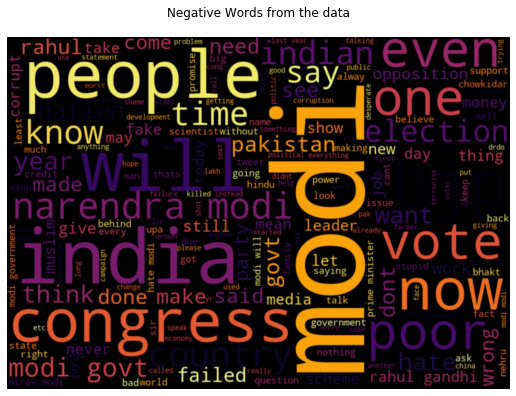

In [8]:
# Taking all the negative words from the cleaned data and displaying them in the word cloud
allwords = ''.join([cmts for cmts in df['clean_text'][df['category'] == -1]])
# Creating the word cloud for all the negative words
wrdcld = WordCloud(width = 1000, height = 700, random_state = random.randint(1, 2001), max_font_size = 250, colormap = 'inferno').generate(allwords)

# Plotting the figure
plt.figure(figsize=(9,9))
plt.imshow(wrdcld, interpolation = "gaussian")

plt.title("Negative Words from the data\n")
plt.axis('off')
plt.show()

#### _NLP Preprocessing_

In [9]:
# Extracting the 'show' description and then converting to np array
test = np.array(df.clean_text)
print("\nDimentions of Clean Text:", test.shape)

# Setting custom print option
np.set_printoptions(precision = 3, suppress = True, threshold = 500)
print("\nTwitter Text Comments: \n", test)


Dimentions of Clean Text: (162969,)

Twitter Text Comments: 
 ['when modi promised minimum government maximum governance expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples'
 'talk all the nonsense and continue all the drama will vote for modi '
 'what did just say vote for modi  welcome bjp told you rahul the main campaigner for modi think modi should just relax'
 ... 'did you cover her interaction forum where she left '
 'there big project came into india modi dream project but not happened reality'
 'have you ever listen about like gurukul where discipline are maintained even narendra modi rss only maintaining the culture indian more attack politics but someone attack hinduism rss will take action that proud for ']


In [10]:
# Lemmatizing helps us group words based on their different use case
# Example: 1. He attacked the enemy. Here attacked is a verb; 2. That was his attack strategy. Here attack is a noun;
lemmatizer = WordNetLemmatizer()
words = []

for line in test:
    # Splitting and updating the list line by line
    words.extend(line.strip().split())
test_lem = list(map(lemmatizer.lemmatize, words))
print("Lemmatized words: \n", pd.DataFrame(test_lem))

# Stemming helps us identify and classify into the root word
ps = PorterStemmer()
test_stem = [ps.stem(i) for i in test_lem]
print("\n\nStemmed words: \n", pd.DataFrame(test_stem))

Lemmatized words: 
                   0
0              when
1              modi
2          promised
3           minimum
4        government
...             ...
3238279        take
3238280      action
3238281        that
3238282       proud
3238283         for

[3238284 rows x 1 columns]


Stemmed words: 
                0
0           when
1           modi
2         promis
3        minimum
4         govern
...          ...
3238279     take
3238280   action
3238281     that
3238282    proud
3238283      for

[3238284 rows x 1 columns]


#### *Vectorizing*

In [11]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
X = bow_vectorizer.fit_transform(test).toarray()
feature_df = pd.DataFrame(X)
feature_names = bow_vectorizer.get_feature_names()

print("Feature Matrix (Vectorized Description) :\n", X)
print("\nFeatured Words are :\n", np.array(feature_names))
print("\nShowing in DataFrame Format: ")
pd.DataFrame(X, columns = feature_names)

Feature Matrix (Vectorized Description) :
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Featured Words are :
 ['aap' 'abhinandan' 'able' ... 'youth' 'yrs' 'zero']

Showing in DataFrame Format: 


,aap,abhinandan,able,absolutely,abt,abuse,accept,according,account,accounts,...,year,years,yes,yesterday,yogi,young,youre,youth,yrs,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162964,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
162965,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
162966,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
162967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### *Scaling*

In [12]:
Y = df['category'].values

print("\nDimentions of X:",X.shape, "\tDimentions of Y:", Y.shape)
print("\nY data: \n", Y)

sc = StandardScaler()
X_sc = sc.fit_transform(X)
print("\n Scaled X data: \n", X_sc)


Dimentions of X: (162969, 1000) 	Dimentions of Y: (162969,)

Y data: 
 [-1.  0.  1. ...  0.  0.  1.]

 Scaled X data: 
 [[-0.066 -0.043 -0.073 ... -0.072 -0.085 -0.044]
 [-0.066 -0.043 -0.073 ... -0.072 -0.085 -0.044]
 [-0.066 -0.043 -0.073 ... -0.072 -0.085 -0.044]
 ...
 [-0.066 -0.043 -0.073 ... -0.072 -0.085 -0.044]
 [-0.066 -0.043 -0.073 ... -0.072 -0.085 -0.044]
 [-0.066 -0.043 -0.073 ... -0.072 -0.085 -0.044]]


*_<h2 align='center'> C. Machine Learning Models</h2>_*

---

### _1. Logistic Regression Classification_

In [13]:
# Splitting the data into train test components
X_train, X_test, Y_train, Y_test = train_test_split(X_sc, Y, test_size=0.225, random_state=0)

print("Train Set Dimensions:\n X:", X_train.shape, "\n Y:", Y_train.shape)
print("\nTest Set Dimensions:\n X:", X_test.shape, "\n Y:", Y_test.shape)

# Setting custom print option
np.set_printoptions(precision = 2, suppress = True, threshold=50)

Train Set Dimensions:
 X: (126300, 1000) 
 Y: (126300,)

Test Set Dimensions:
 X: (36669, 1000) 
 Y: (36669,)


(Logistic Regression) Test Data Accuracy: 75.9688019853282 %	 Train Data Accuracy: 76.65003958828187 %

Test Data [Prediction | Actual results]:
[[-1. -1.]
 [-1. -1.]
 [-1. -1.]
 ...
 [ 0.  0.]
 [-1. -1.]
 [ 1.  1.]]

Test Data Confusion Matrix:
 [[ 4427  2113  1372]
 [  188 11616   591]
 [ 1039  3509 11814]]

Test Data Classification Report:
              precision    recall  f1-score   support

        -1.0       0.78      0.56      0.65      7912
         0.0       0.67      0.94      0.78     12395
         1.0       0.86      0.72      0.78     16362

    accuracy                           0.76     36669
   macro avg       0.77      0.74      0.74     36669
weighted avg       0.78      0.76      0.76     36669


Test Data Total Correct Prediction = 27857 / 36669


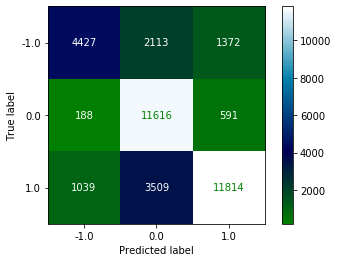


Train Data Confusion Matrix:
 [[15481  7507  4609]
 [  609 40394  1813]
 [ 3152 11801 40934]]

Train Data Classification Report:
              precision    recall  f1-score   support

        -1.0       0.80      0.56      0.66     27597
         0.0       0.68      0.94      0.79     42816
         1.0       0.86      0.73      0.79     55887

    accuracy                           0.77    126300
   macro avg       0.78      0.75      0.75    126300
weighted avg       0.79      0.77      0.76    126300


Train Data Total Correct Prediction = 96809 / 126300


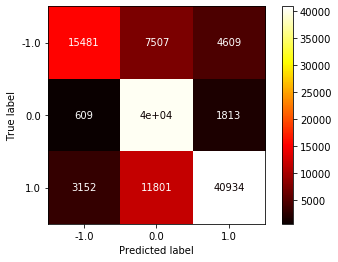

In [14]:
# 1
# Logistic Regression (Based on a 2 outcome classification)

# Fitting into the model
log = LogisticRegression()
log.fit(X_train, Y_train)

# test and train logarithmic prediction models
test_Y_pred = log.predict(X_test)
train_Y_pred = log.predict(X_train)
CM_test = confusion_matrix(Y_test, test_Y_pred)
CM_train = confusion_matrix(Y_train, train_Y_pred)

# printing the accuracy scores, confusion matrix, and the correct predictions with the classifed report
print("(Logistic Regression) Test Data Accuracy:", accuracy_score(Y_test, test_Y_pred)*100, "%\t", "Train Data Accuracy:", accuracy_score(Y_train, train_Y_pred)*100, "%")
print("\nTest Data [Prediction | Actual results]:")
print(np.concatenate((test_Y_pred.reshape(-1,1), Y_test.reshape(-1,1)), axis =1))
print("\nTest Data Confusion Matrix:\n", CM_test)
print("\nTest Data Classification Report:")
print(classification_report(Y_test, test_Y_pred))
print("\nTest Data Total Correct Prediction =", CM_test.trace(), "/", X_test.shape[0])
plot_confusion_matrix(log, X_test, Y_test, cmap='ocean')
plt.show()

print("\nTrain Data Confusion Matrix:\n", CM_train)
print("\nTrain Data Classification Report:")
print(classification_report(Y_train, train_Y_pred))
print("\nTrain Data Total Correct Prediction =", CM_train.trace(), "/", X_train.shape[0])
plot_confusion_matrix(log, X_train, Y_train, cmap='hot')
plt.show()

In [15]:
# Testing with Example data: 
test_id = random.randint(0,df.shape[0])
Model_Prediction = log.predict(sc.transform([X[test_id]]))
result = {1:"Positive", -1:"Negative", 0:"Neutral"}
print("Sentiment Prediction of the Comment by ML model =", result[int(Model_Prediction)])
print("True Sentiment of the Comment by ML model =", result[int(df.iloc[[test_id]]['category'])])
df.iloc[[test_id]]

Sentiment Prediction of the Comment by ML model = Neutral
True Sentiment of the Comment by ML model = Neutral


,clean_text,category
43143,articles against this scheme modi tamed media ...,0.0


### _2. K-Nearest Neighbors Classification_

In [16]:
# Splitting the data into train test components
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.075, random_state=0)
print("Train Set Dimensions:\n X:", X_train.shape, "\n Y:", Y_train.shape)
print("\nTest Set Dimensions:\n X:", X_test.shape, "\n Y:", Y_test.shape)

# Setting custom print option
np.set_printoptions(precision=2, suppress=True, threshold=50)

Train Set Dimensions:
 X: (150746, 1000) 
 Y: (150746,)

Test Set Dimensions:
 X: (12223, 1000) 
 Y: (12223,)



(KNN-classification) Accuracy: 52.00850854945595 %

Test Data [Prediction | Actual results]:
[[ 0. -1.]
 [ 0. -1.]
 [ 0. -1.]
 ...
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  1.]]

 Confusion Matrix:
 [[ 620 1799  177]
 [ 130 3914  107]
 [ 295 3358 1823]]

Test Data Classification Report:
              precision    recall  f1-score   support

        -1.0       0.59      0.24      0.34      2596
         0.0       0.43      0.94      0.59      4151
         1.0       0.87      0.33      0.48      5476

    accuracy                           0.52     12223
   macro avg       0.63      0.50      0.47     12223
weighted avg       0.66      0.52      0.49     12223


Total Correct Prediction = 6357 / 12223


<Figure size 432x288 with 0 Axes>

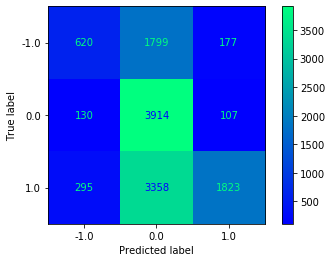

In [17]:
# 2
# KNN Classification

# Fitting into the model
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

# printing the accuracy scores, confusion matrix, and the correct predictions with the classifed report
print("\n(KNN-classification) Accuracy:", accuracy_score(Y_test, Y_pred)*100, "%")
print("\nTest Data [Prediction | Actual results]:")
print(np.concatenate((Y_pred.reshape(-1,1), Y_test.reshape(-1,1)), axis =1))
CM = confusion_matrix(Y_test, Y_pred)

print("\n Confusion Matrix:\n", CM)
print("\nTest Data Classification Report:")
print(classification_report(Y_test, Y_pred))
plt.clf()

print("\nTotal Correct Prediction =", CM.trace(), "/", X_test.shape[0])
plot_confusion_matrix(knn, X_test, Y_test, cmap='winter')
plt.show()

### _3. Decision Tree_

(Decision Tree) Test Data Accuracy: 70.39188415282663 %	 Train Data Accuracy: 98.38470009154472 %

Test Data [Prediction | Actual results]:
[[-1. -1.]
 [-1. -1.]
 [ 1. -1.]
 ...
 [ 0.  0.]
 [ 0.  0.]
 [ 1.  1.]]

Test Data Confusion Matrix:
 [[1493  474  629]
 [ 435 3131  585]
 [ 665  831 3980]]

Test Data Classification Report:
              precision    recall  f1-score   support

        -1.0       0.58      0.58      0.58      2596
         0.0       0.71      0.75      0.73      4151
         1.0       0.77      0.73      0.75      5476

    accuracy                           0.70     12223
   macro avg       0.68      0.69      0.68     12223
weighted avg       0.71      0.70      0.70     12223


Test Data Total Correct Prediction = 8604 / 12223


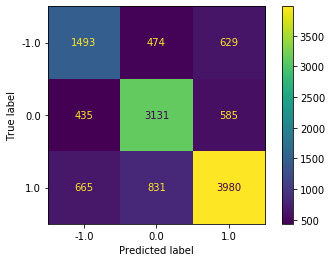


Train Data Confusion Matrix:
 [[32177   692    44]
 [  147 50859    54]
 [   96  1402 65275]]

Train Data Classification Report:
              precision    recall  f1-score   support

        -1.0       0.99      0.98      0.99     32913
         0.0       0.96      1.00      0.98     51060
         1.0       1.00      0.98      0.99     66773

    accuracy                           0.98    150746
   macro avg       0.98      0.98      0.98    150746
weighted avg       0.98      0.98      0.98    150746


Train Data Total Correct Prediction = 148311 / 150746


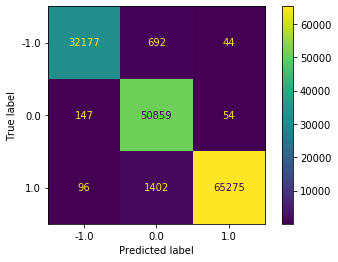

In [18]:
# 3
# Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

# Fitting into the model and getting the confusion matrix values
test_Y_pred = dt.predict(X_test)
train_Y_pred = dt.predict(X_train)
CM_test = confusion_matrix(Y_test, test_Y_pred)
CM_train = confusion_matrix(Y_train, train_Y_pred)

# printing the accuracy scores, confusion matrix, and the correct predictions with the classifed report
print("(Decision Tree) Test Data Accuracy:", accuracy_score(Y_test, test_Y_pred)*100, "%\t", "Train Data Accuracy:", accuracy_score(Y_train, train_Y_pred)*100, "%")
print("\nTest Data [Prediction | Actual results]:")
print(np.concatenate((test_Y_pred.reshape(-1,1), Y_test.reshape(-1,1)), axis =1))
print("\nTest Data Confusion Matrix:\n", CM_test)
print("\nTest Data Classification Report:")
print(classification_report(Y_test, test_Y_pred))
print("\nTest Data Total Correct Prediction =", CM_test.trace(), "/", X_test.shape[0])
plot_confusion_matrix(dt, X_test, Y_test)
plt.show()

print("\nTrain Data Confusion Matrix:\n", CM_train)
print("\nTrain Data Classification Report:")
print(classification_report(Y_train, train_Y_pred))
print("\nTrain Data Total Correct Prediction =", CM_train.trace(), "/", X_train.shape[0])
plot_confusion_matrix(dt, X_train, Y_train)
plt.show()